**Inteligência Artificial**

**793605 - Caio Faria Diniz**

**Lista 02**

**Link Notebook**
https://colab.research.google.com/drive/1RDRyy_veFIH3uxOmu-FfNjlkZMebKHoa#scrollTo=d0BmQICMpY5G&printMode=true

---
---


### **Questão 1**

---

Encontrar o padrão de pessoas que sobreviveram ao desastre do TITANIC, que matou mais de 1.500 pessoas em 1912. A base de dados está no CANVAS.

<ipython-input-10-073dceabca84>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  treino['Age'].fillna(treino['Age'].median(), inplace=True)
<ipython-input-10-073dceabca84>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Fitting 10 folds for each of 224 candidates, totalling 2240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


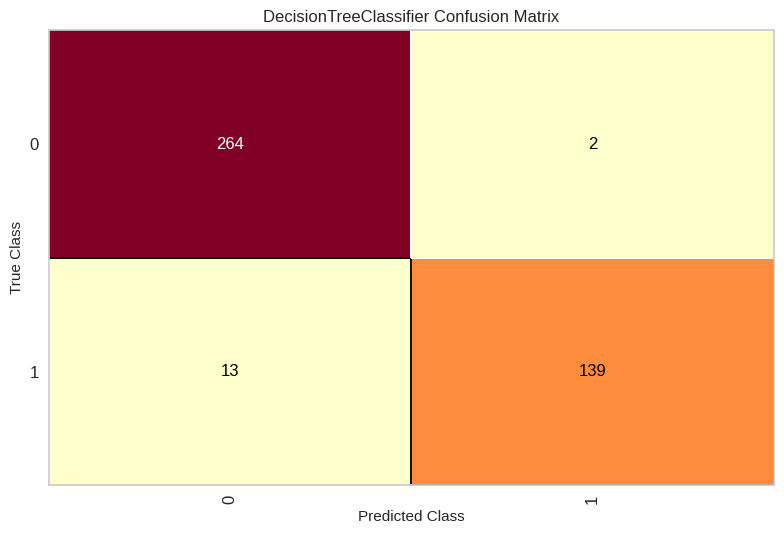

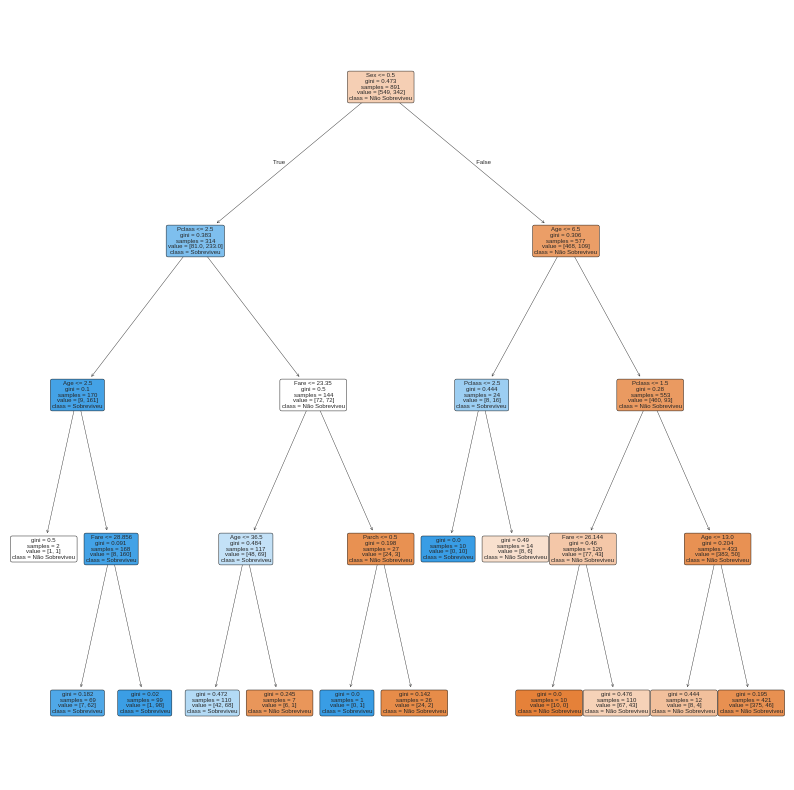

  Feature  Importância
1     Sex     0.615847
0  Pclass     0.227955
2     Age     0.081102
5    Fare     0.066973
4   Parch     0.008122
3   SibSp     0.000000


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')
respostas = pd.read_csv('gender_submission.csv')

teste = teste.merge(respostas, on='PassengerId', how='left')

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

encoder = LabelEncoder()
treino['Sex'] = encoder.fit_transform(treino['Sex'])
teste['Sex'] = encoder.transform(teste['Sex'])

treino['Age'].fillna(treino['Age'].median(), inplace=True)
teste['Age'].fillna(teste['Age'].median(), inplace=True)

treino['Fare'].fillna(treino['Fare'].median(), inplace=True)
teste['Fare'].fillna(teste['Fare'].median(), inplace=True)

X_train = treino.drop(columns=drop_cols + ['Survived'])
y_train = treino['Survived']
X_test = teste.drop(columns=drop_cols + ['Survived'])
y_test = teste['Survived']

parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [20, 30, 40, 50]
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parametros,
    cv=10,
    n_jobs=5,
    verbose=1
)

grid.fit(X_train, y_train)

melhores_params = grid.best_params_
melhor_score = grid.best_score_

modelo = DecisionTreeClassifier(
    max_depth=4,
    criterion='gini',
    max_features=melhores_params['max_features'],
    min_samples_split=melhores_params['min_samples_split'],
    random_state=42
)
modelo.fit(X_train, y_train)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)
relatorio = classification_report(y_test, y_pred)

cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

plt.figure(figsize=(10, 10))
tree.plot_tree(
    modelo,
    feature_names=X_train.columns,
    class_names=['Não Sobreviveu', 'Sobreviveu'],
    filled=True,
    rounded=True
)
plt.show()

importancias = modelo.feature_importances_
features = pd.DataFrame({'Feature': X_train.columns, 'Importância': importancias})
features.sort_values(by='Importância', ascending=False, inplace=True)
print(features)


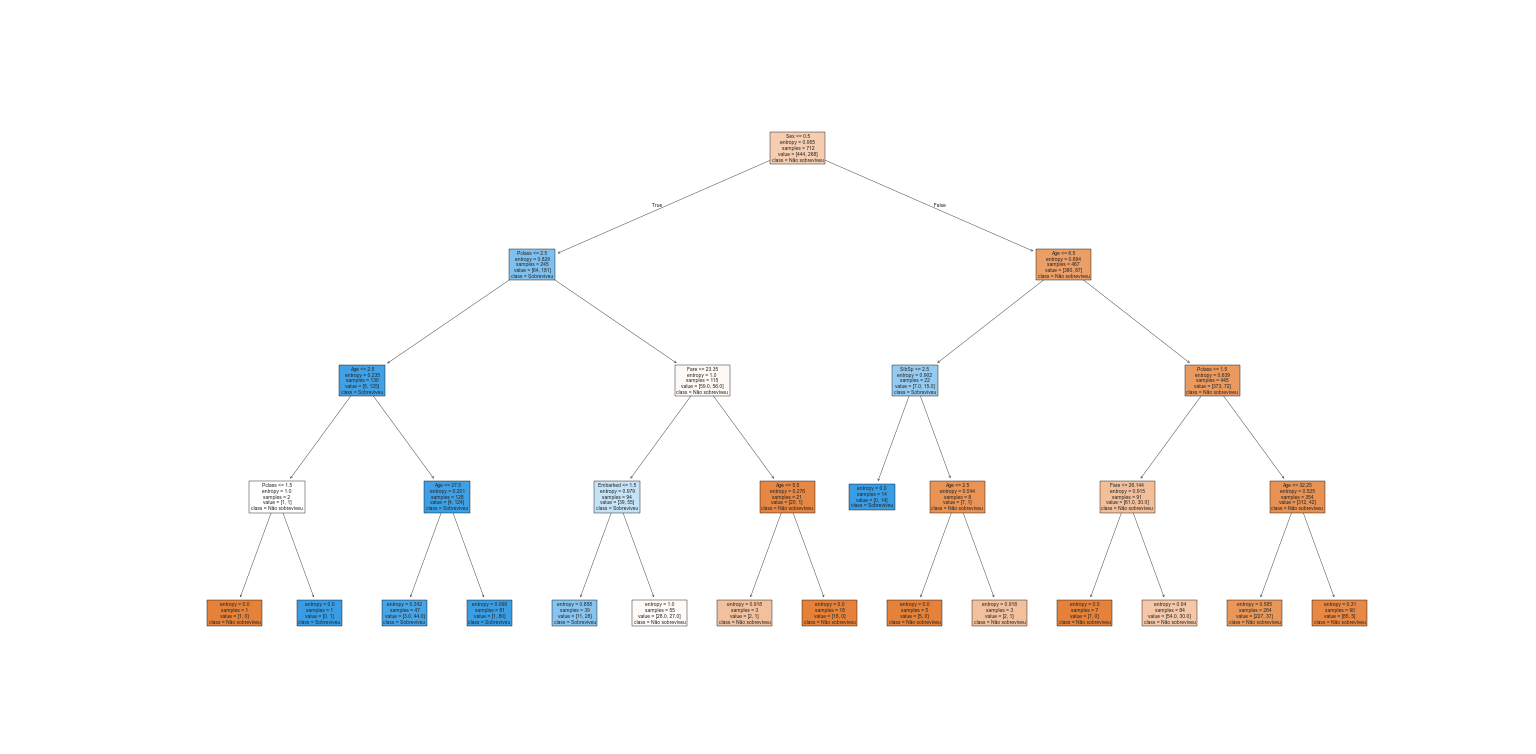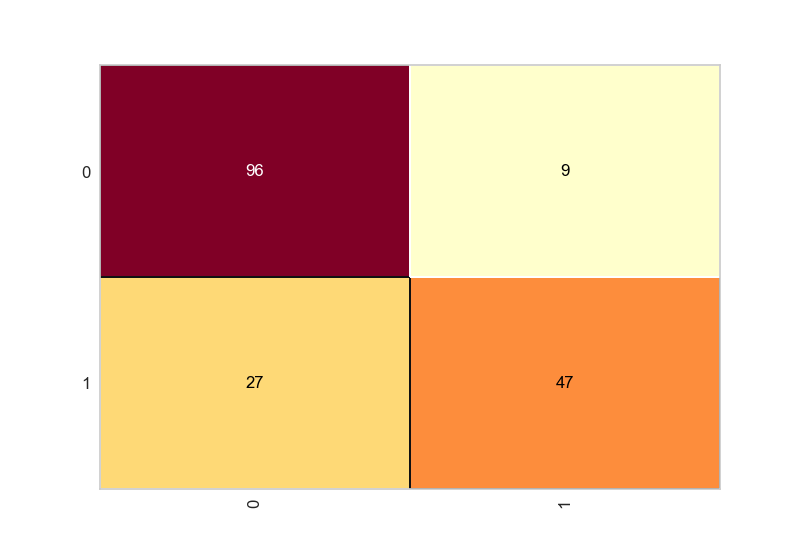

A árvore de decisão mostra os principais fatores que influenciaram a sobrevivência no Titanic:

1. **Sexo (Sex)**: O fator mais importante. Mulheres (Sex = 0) tinham muito mais chances de sobreviver.
2. **Classe da passagem (Pclass)**: Passageiros da 1ª classe tiveram maior taxa de sobrevivência do que os da 3ª.
3. **Idade (Age)**: Passageiros mais jovens tiveram mais chances de sobreviver, especialmente crianças.
4. **Número de parentes a bordo (SibSp, Parch)**: Pessoas com familiares a bordo tinham maior probabilidade de sobreviver.

### **Questão 2**

---

Considerando o artigo "A comparative study of decision tree ID3 and C4.5":

1. As principais diferenças entre os algoritmos ID3 e C4.5 são:

 As diferenças entre ID3 e C4.5 são:

- Tipos de dados: onde ID3 é Apenas categórico e o C4.5 é Categóricos e Numéricos;
- Dados Faltantes: ID3 Ignora e C4.5 Lida usando probabilidades;
- Critério de Divisão: ID3 usa Ganho de Informação e o C4.5 usa Razão de Ganho;
- Poda: ID3 Não possui e o C4.5 Possui poda para evitar overfitting;
- Tratamento de Ruídos: ID3 Não tem e o C4.5 tem.

2. O algoritmo C4.5 converte atributos numéricos em intervalos de valores.
Isso é feito calculando o ponto de corte que maximiza o ganho de informação.
Por exemplo, para o atributo idade, C4.5 pode criar um intervalo:

Idade ≤ 30 anos;

Idade > 30;


### **Questão 3**

---

Considerando a árvore que classifica o objeto nas classes: Iris_Setosa, Iris_Virgínica e Iris_Versicolor e que esta árvore foi gerada com os hiperparâmetros (DecisionTreeClassifier(criterion='gini', max_depth=3)),
usando a linguagem Python.

Qual as **saídas** da árvore para os seguintes **registros de teste**, respectivamente?


| Registros de teste | Tamanho da Pétala | Largura da Pétala | Tamanho da Sépala | Largura da Sépala |
|------------|------|------|------|------|
|Instância 1 | 3.46 | 0.87 | 2.45 | 1.78 |
|Instância 2 | 1.67 | 1.89 | 0.78 | 1.32 |
|Instância 3 | 2.56 | 2.34 | 2.45 | 1.78 |
|Instância 4 | 6.67 | 2.34 | 2.45 | 1.78 |

a) Iris_Virgínica, íris_Setosa, Iris_Versicolor, Iris_Virgínica

b) Iris_ Setosa, íris_Setosa, Iris_Virgínica , Iris_Versicolor

c) Iris_Versicolor, íris_Setosa, Iris_Versicolor, Iris_Virgínica

d) Íris_Setosa, Iris_Virgínica, Iris_Virgínica , Iris_Versicolor

e) Iris_Versicolor, Íris_Setosa, Iris_Versicolor, Íris_Setosa

**Resposta: Letra C**

### **Questão 4**

---

Considerando a árvore da questão anterior:

  I. Esta árvore possui 5 regras de classificação

  II. Das regras geradas, há apenas uma com cobertura por classe de 100%

  III. A menor cobertura por classe é de 6.8% e corresponde à classe Iris_Virgínica

É correto o que se afirma em:

a) I, apenas.

b) III, apenas.

c) I e II, apenas.

d) I e III, apenas.

e) I, II e III.

**Resposta: Letra A**

### **Questão 5**

---

Considere a seguinte matriz de confusão:

|   |  A |  B |  C |  D |
|---|----|----|----|----|
| A | 10 |  4 |  2 |  1 |
| B |  1 | 15 |  2 |  0 |
| C |  2 |  3 | 20 |  5 |
| D |  4 |  1 |  2 | 50 |

Quais os valores para as métricas abaixo para cada uma das classes A, B, C e D?

|   |  Precisão |  Recall | F1Score | TVP | TFN | TFP | TVN |
|---|-----------|---------|---------|-----|-----|-----|-----|
| A |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| B |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| C |     -     |    -    |    -    |  -  |  -  |  -  |  -  |
| D |     -     |    -    |    -    |  -  |  -  |  -  |  -  |

**Respostas: Executar o código abaixo**


In [12]:
import numpy as np
import pandas as pd

def calcular_metricas(conf_matrix):
    classes = ['A', 'B', 'C', 'D']
    metricas = {"Precisão": [], "Recall": [], "F1Score": [], "TVP": [], "TFN": [], "TFP": [], "TVN": []}

    total = np.sum(conf_matrix)
    soma_linhas = np.sum(conf_matrix, axis=1)
    soma_colunas = np.sum(conf_matrix, axis=0)

    for i in range(len(classes)):
        VP, FN, FP = conf_matrix[i, i], soma_linhas[i] - conf_matrix[i, i], soma_colunas[i] - conf_matrix[i, i]
        VN = total - (VP + FN + FP)

        precisao = VP / (VP + FP) if (VP + FP) else None
        recall = VP / (VP + FN) if (VP + FN) else None
        f1_score = 2 * (precisao * recall) / (precisao + recall) if (precisao and recall and (precisao + recall)) else None
        tvp, tfn = (VP / (VP + FN), FN / (VP + FN)) if (VP + FN) else (None, None)
        tfp, tvn = (FP / (FP + VN), VN / (FP + VN)) if (FP + VN) else (None, None)

        metricas["Precisão"].append(precisao)
        metricas["Recall"].append(recall)
        metricas["F1Score"].append(f1_score)
        metricas["TVP"].append(tvp)
        metricas["TFN"].append(tfn)
        metricas["TFP"].append(tfp)
        metricas["TVN"].append(tvn)

    return pd.DataFrame(metricas, index=classes)

if __name__ == "__main__":
    matriz = np.array([[10, 4, 2, 1],
                       [1, 15, 2, 0],
                       [2, 3, 20, 5],
                       [4, 1, 2, 50]])

    print(calcular_metricas(matriz))


   Precisão    Recall   F1Score       TVP       TFN       TFP       TVN
A  0.588235  0.588235  0.588235  0.588235  0.411765  0.066667  0.933333
B  0.652174  0.833333  0.731707  0.833333  0.166667  0.076923  0.923077
C  0.769231  0.666667  0.714286  0.666667  0.333333  0.065217  0.934783
D  0.892857  0.877193  0.884956  0.877193  0.122807  0.092308  0.907692
